<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session9/QuizDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-rcl7qq5u
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-rcl7qq5u
     |████████████████████████████████| 634kB 8.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=a3c38e00fe5e5cc9dd8c85922c06d3363c22df662491b1b3901badb8b8aee4cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-fpvogv3y/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=03bef309f69935453af5237317f4ac4e050bd422fe7acc841277c78917fddefd
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/API'
sys.path.append(folder)


In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test
import evaluate
import QuizDnn
from Albumentationtransform import AlbumentationTransforms

In [0]:
import albumentations as A

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       #A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) 
                                       ])
# Test Phase transformations
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


In [9]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


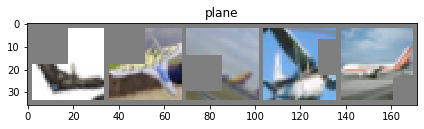

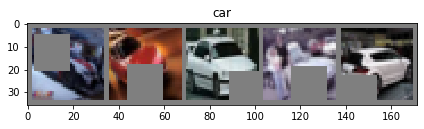

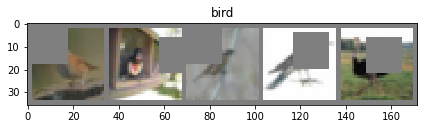

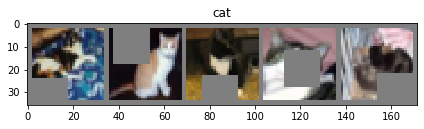

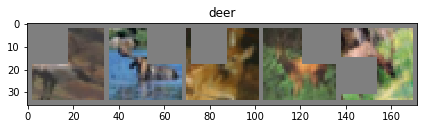

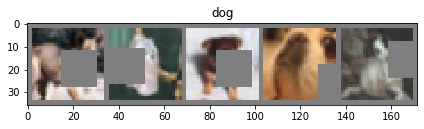

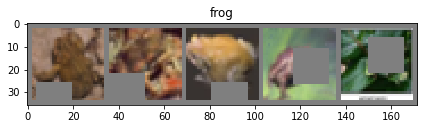

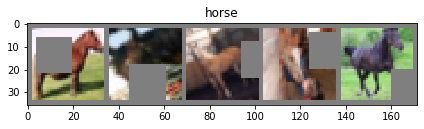

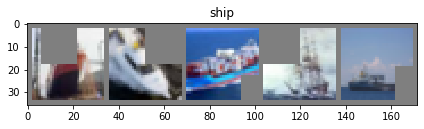

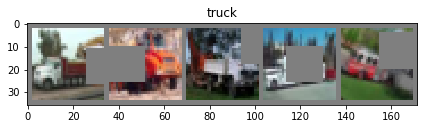

In [10]:
show_images.show_train_data(trainloader, classes)

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class QuizDNN(nn.Module):
    def __init__(self):
        super(QuizDNN, self).__init__()

        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )
        self.convblock9 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(p = 0.1),
            
            )

        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.Sequential(
            nn.AdaptiveAvgPool2d(1)
        )
            



        self.fc =  nn.Conv2d(in_channels=64, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)#Op_size = 1, 

      


    def forward(self, x):

        x1 = self.convblock1(x)
        x2 = self.convblock9(x1)
        x3 = self.convblock2(x1+x2)
        x4 = self.pool(x1+x2+x3) 
        x5 = self.convblock3(x4) 
        x6 = self.convblock4(x4+x5)
        x7 = self.convblock5(x4+x5+x6)
        x8 = self.pool(x5+x6+x7) 
        x9 = self.convblock6(x8)
        x10 = self.convblock7(x8+x9)
        x11 = self.convblock8(x8+x9+x10)
        x12 = self.gap(x11)
        x13 = self.fc(x12)
      
   
       
     
        x = x13.view(-1, 10)
      
        return x

# -----------------------------------------------ARCHITECTURE---------------------------------------
# x1 = Input
# x2 = Conv(x1)
# x3 = Conv(x1 + x2)
# x4 = MaxPooling(x1 + x2 + x3)
# x5 = Conv(x4)
# x6 = Conv(x4 + x5)
# x7 = Conv(x4 + x5 + x6)
# x8 = MaxPooling(x5 + x6 + x7)
# x9 = Conv(x8)
# x10 = Conv (x8 + x9)
# x11 = Conv (x8 + x9 + x10)
# x12 = GAP(x11)
# x13 = FC(x12)




In [11]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = QuizDnn.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [13]:
testLoss = []
testAcc = []
EPOCHS = 30

for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
    


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.2925368547439575 Batch_id=390 Accuracy=43.96: 100%|██████████| 391/391 [00:19<00:00, 19.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5620/10000 (56.20%)

EPOCH: 2 LR: 0.1


Loss=1.0876638889312744 Batch_id=390 Accuracy=57.14: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 5785/10000 (57.85%)

EPOCH: 3 LR: 0.1


Loss=0.9249833226203918 Batch_id=390 Accuracy=61.47: 100%|██████████| 391/391 [00:18<00:00, 21.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6926/10000 (69.26%)

EPOCH: 4 LR: 0.1


Loss=0.9506819844245911 Batch_id=390 Accuracy=65.17: 100%|██████████| 391/391 [00:18<00:00, 21.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7061/10000 (70.61%)

EPOCH: 5 LR: 0.1


Loss=0.8385311961174011 Batch_id=390 Accuracy=67.09: 100%|██████████| 391/391 [00:18<00:00, 21.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7038/10000 (70.38%)

EPOCH: 6 LR: 0.1


Loss=0.8471353650093079 Batch_id=390 Accuracy=68.33: 100%|██████████| 391/391 [00:18<00:00, 21.45it/s]
Loss=1.0409233570098877 Batch_id=390 Accuracy=69.27: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7575/10000 (75.75%)

EPOCH: 8 LR: 0.1


Loss=0.6185318231582642 Batch_id=390 Accuracy=69.85: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7544/10000 (75.44%)

EPOCH: 9 LR: 0.1


Loss=0.7299401760101318 Batch_id=390 Accuracy=70.59: 100%|██████████| 391/391 [00:18<00:00, 21.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7570/10000 (75.70%)

EPOCH: 10 LR: 0.1


Loss=0.971816897392273 Batch_id=390 Accuracy=71.15: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 7102/10000 (71.02%)

EPOCH: 11 LR: 0.1


Loss=0.7656774520874023 Batch_id=390 Accuracy=71.28: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7712/10000 (77.12%)

EPOCH: 12 LR: 0.1


Loss=0.7823919057846069 Batch_id=390 Accuracy=71.46: 100%|██████████| 391/391 [00:19<00:00, 20.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7805/10000 (78.05%)

EPOCH: 13 LR: 0.1


Loss=0.6617687344551086 Batch_id=390 Accuracy=71.91: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7861/10000 (78.61%)

EPOCH: 14 LR: 0.1


Loss=0.7561289072036743 Batch_id=390 Accuracy=72.13: 100%|██████████| 391/391 [00:18<00:00, 20.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7852/10000 (78.52%)

EPOCH: 15 LR: 0.1


Loss=0.9485005140304565 Batch_id=390 Accuracy=72.23: 100%|██████████| 391/391 [00:19<00:00, 20.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7911/10000 (79.11%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.6672294735908508 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:19<00:00, 20.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8472/10000 (84.72%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.6839319467544556 Batch_id=390 Accuracy=78.65: 100%|██████████| 391/391 [00:19<00:00, 20.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8500/10000 (85.00%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.523128867149353 Batch_id=390 Accuracy=79.06: 100%|██████████| 391/391 [00:19<00:00, 20.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8565/10000 (85.65%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.5948798656463623 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:19<00:00, 20.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8533/10000 (85.33%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.6143935322761536 Batch_id=390 Accuracy=80.15: 100%|██████████| 391/391 [00:19<00:00, 20.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8582/10000 (85.82%)

EPOCH: 21 LR: 0.010000000000000002


Loss=0.5244432687759399 Batch_id=390 Accuracy=80.40: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8598/10000 (85.98%)

EPOCH: 22 LR: 0.010000000000000002


Loss=0.557449221611023 Batch_id=390 Accuracy=80.52: 100%|██████████| 391/391 [00:19<00:00, 20.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8634/10000 (86.34%)

EPOCH: 23 LR: 0.010000000000000002


Loss=0.4970436692237854 Batch_id=390 Accuracy=80.91: 100%|██████████| 391/391 [00:19<00:00, 20.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8638/10000 (86.38%)

EPOCH: 24 LR: 0.010000000000000002


Loss=0.654623806476593 Batch_id=390 Accuracy=80.98: 100%|██████████| 391/391 [00:19<00:00, 20.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8648/10000 (86.48%)

EPOCH: 25 LR: 0.010000000000000002


Loss=0.5683585405349731 Batch_id=390 Accuracy=81.12: 100%|██████████| 391/391 [00:19<00:00, 20.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8658/10000 (86.58%)

EPOCH: 26 LR: 0.010000000000000002


Loss=0.5459686517715454 Batch_id=390 Accuracy=81.28: 100%|██████████| 391/391 [00:19<00:00, 20.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8716/10000 (87.16%)

EPOCH: 27 LR: 0.010000000000000002


Loss=0.620903491973877 Batch_id=390 Accuracy=81.55: 100%|██████████| 391/391 [00:19<00:00, 20.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8716/10000 (87.16%)

EPOCH: 28 LR: 0.010000000000000002


Loss=0.3320646286010742 Batch_id=390 Accuracy=81.54: 100%|██████████| 391/391 [00:19<00:00, 20.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8707/10000 (87.07%)

EPOCH: 29 LR: 0.010000000000000002


Loss=0.605611264705658 Batch_id=390 Accuracy=81.74: 100%|██████████| 391/391 [00:19<00:00, 20.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8747/10000 (87.47%)

EPOCH: 30 LR: 0.010000000000000002


Loss=0.43567028641700745 Batch_id=390 Accuracy=81.97: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]



Test set: Average loss: 0.0031, Accuracy: 8691/10000 (86.91%)



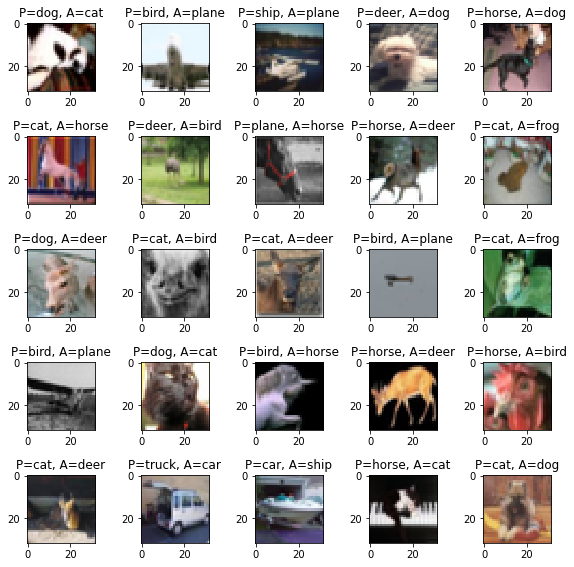

In [14]:
evaluate.show_misclassified_images(model, device, testloader, classes)

In [15]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 86 %


In [16]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 90 %
Accuracy of   car : 97 %
Accuracy of  bird : 83 %
Accuracy of   cat : 74 %
Accuracy of  deer : 84 %
Accuracy of   dog : 77 %
Accuracy of  frog : 87 %
Accuracy of horse : 92 %
Accuracy of  ship : 90 %
Accuracy of truck : 92 %


Text(0.5, 1.0, 'Test Accuracy')

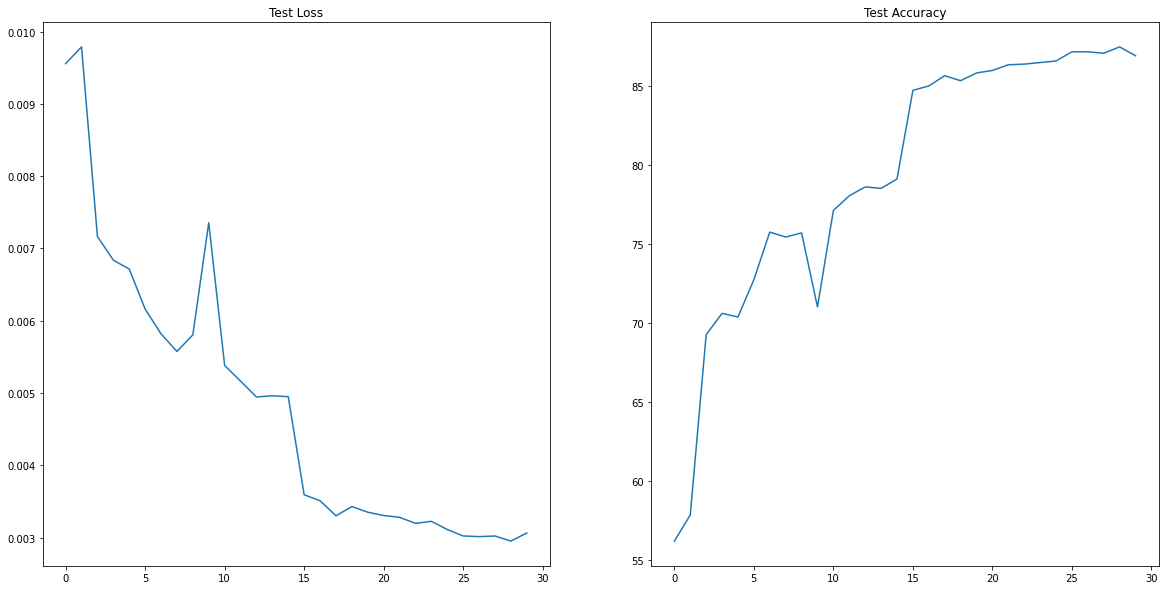

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")

